<a href="https://colab.research.google.com/github/clwilkinson7/Temp/blob/main/Week_11_DL7_1_Weekly_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Training a convnet from scratch on a small dataset

**Install dataset**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Facial Recognition Dataset.zip to Facial Recognition Dataset.zip


In [2]:
try:
  !rm -rf Facial\ Recognition\ Dataset
except:
  pass

!unzip -q Facial\ Recognition\ Dataset.zip

In [3]:
try:
  !rm -rf /content/Dataset/*
except:
  pass

!mkdir -p Dataset/Train/PersonA Dataset/Train/PersonB Dataset/Train/PersonC
!mkdir -p Dataset/Validation/PersonA Dataset/Validation/PersonB Dataset/Validation/PersonC
!mkdir -p Dataset/Test/PersonA Dataset/Test/PersonB Dataset/Test/PersonC

In [4]:
import os
import cv2

imagePaths = []
imageLabels = []
dataset = "Facial Recognition Dataset"

for label in os.listdir(dataset):
  labelPath = os.path.join(dataset, label)
  for imageName in os.listdir(labelPath):
      imagePath = os.path.join(labelPath, imageName)
      if imagePath.endswith((".bmp", ".gif", ".jpeg", ".jpg", ".png", ".JPG")):
        if imageName.endswith(".JPG"):
            newImagePath = imagePath[:-4] + ".jpg"
            os.rename(imagePath, newImagePath)
            imagePath = newImagePath
        else:
            imagePath = newImagePath

        imagePaths.append(imagePath)
        imageLabels.append(label)


In [5]:
from sklearn.model_selection import train_test_split

trainDataset, tempDataset, trainLabels, tempLabels = train_test_split(imagePaths, imageLabels, test_size=0.4, random_state=42, stratify=imageLabels)
validationDataset, testDataset, validationLabels, testLabels = train_test_split(tempDataset, tempLabels, test_size=0.5, random_state=42, stratify=tempLabels)

In [6]:
print("Train dataset size:", len(trainDataset))
print("Validation dataset size:", len(validationDataset))
print("Test dataset size:", len(testDataset))

Train dataset size: 144
Validation dataset size: 48
Test dataset size: 48


In [7]:
import shutil
from pathlib import Path

trainDir = Path("Dataset/Train/")
validationDir = Path("Dataset/Validation/")
testDir = Path("Dataset/Test/")

trainDirs = [str(dir) for dir in trainDir.iterdir()]
validationDirs = [str(dir) for dir in validationDir.iterdir()]
testDirs = [str(dir) for dir in testDir.iterdir()]


def ImageCopy(dataset, datasetDirs):
  for path in dataset:
    if os.path.isfile(path):
      label = os.path.basename(os.path.dirname(path))
      for dir in datasetDirs:
        if label == os.path.basename(dir):
          shutil.copy(path, dir)

ImageCopy(trainDataset, trainDirs)
ImageCopy(validationDataset, validationDirs)
ImageCopy(testDataset, testDirs)

In [8]:
import os, shutil

base_dir = 'Dataset'

train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validation')
test_dir = os.path.join(base_dir, 'Test')

train_Asa_dir = os.path.join(train_dir, 'PersonA')
train_Beth_dir = os.path.join(train_dir, 'PersonB')
train_Callum_dir = os.path.join(train_dir, 'PersonC')

validation_Asa_dir = os.path.join(validation_dir, 'PersonA')
validation_Beth_dir = os.path.join(validation_dir, 'PersonB')
validation_Callum_dir = os.path.join(validation_dir, 'PersonC')

test_Asa_dir = os.path.join(test_dir, 'PersonA')
test_Beth_dir = os.path.join(test_dir, 'PersonB')
test_Callum_dir = os.path.join(test_dir, 'PersonC')

In [9]:
print('total training Callum images:', len(os.listdir(train_Callum_dir)))

total training Callum images: 48


**Instantiating a small convnet for dogs vs. cats classification**

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [11]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Using `image_dataset_from_directory` to read images**

In [13]:
from tensorflow.keras.utils import image_dataset_from_directory

imageSize = (180, 180)
batchSize = 8

trainDatasetBatched = image_dataset_from_directory(
    trainDir,
    image_size = imageSize,
    batch_size = batchSize,
)

validationDatasetBatched = image_dataset_from_directory(
    validationDir,
    image_size=imageSize,
    batch_size = batchSize,
)

testDatasetBatched = image_dataset_from_directory(
    testDir,
    image_size = imageSize,
    batch_size=batchSize,
)

Found 144 files belonging to 3 classes.
Found 48 files belonging to 3 classes.
Found 48 files belonging to 3 classes.


##train_dataset now includes a number of batches (of images)

In [14]:
batch_id=1
for data_batch, labels_batch in trainDatasetBatched:
     print('batch_id:', batch_id)
     print('data batch shape:', data_batch.shape)
     print('labels batch shape:', labels_batch.shape)
     batch_id+=1

batch_id: 1
data batch shape: (8, 180, 180, 3)
labels batch shape: (8,)
batch_id: 2
data batch shape: (8, 180, 180, 3)
labels batch shape: (8,)
batch_id: 3
data batch shape: (8, 180, 180, 3)
labels batch shape: (8,)
batch_id: 4
data batch shape: (8, 180, 180, 3)
labels batch shape: (8,)
batch_id: 5
data batch shape: (8, 180, 180, 3)
labels batch shape: (8,)
batch_id: 6
data batch shape: (8, 180, 180, 3)
labels batch shape: (8,)
batch_id: 7
data batch shape: (8, 180, 180, 3)
labels batch shape: (8,)
batch_id: 8
data batch shape: (8, 180, 180, 3)
labels batch shape: (8,)
batch_id: 9
data batch shape: (8, 180, 180, 3)
labels batch shape: (8,)
batch_id: 10
data batch shape: (8, 180, 180, 3)
labels batch shape: (8,)
batch_id: 11
data batch shape: (8, 180, 180, 3)
labels batch shape: (8,)
batch_id: 12
data batch shape: (8, 180, 180, 3)
labels batch shape: (8,)
batch_id: 13
data batch shape: (8, 180, 180, 3)
labels batch shape: (8,)
batch_id: 14
data batch shape: (8, 180, 180, 3)
labels batch

##Randomly display some images from the training set

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
i= 9
for images, _ in trainDatasetBatched.take(1): #take a batch
      for i in range(i): #take 9 from the batch
          ax = plt.subplot(3, 3, i + 1)
          plt.imshow(images[i].numpy().astype("uint8"))
          plt.axis("off")

<Figure size 1000x1000 with 0 Axes>

In [17]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    trainDatasetBatched,
    epochs=30,
    validation_data=validationDatasetBatched,
    callbacks=callbacks)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - accuracy: 0.2742 - loss: 2.1246 - val_accuracy: 0.3333 - val_loss: 0.0585
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.3012 - loss: 0.2282 - val_accuracy: 0.3333 - val_loss: -0.0375
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step - accuracy: 0.3301 - loss: 0.7269 - val_accuracy: 0.3333 - val_loss: -0.1015
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.2767 - loss: 0.2521 - val_accuracy: 0.3333 - val_loss: -0.2097
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.3396 - loss: 0.7208 - val_accuracy: 0.3333 - val_loss: -0.7114
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.3380 - loss: 4.6816 - val_accuracy: 0.3333 - val_loss: -5.1794
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.3192 - loss: -2.6895 - val_accuracy: 0.3750 - val_loss: -2.8659
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.3032 - loss: -10.3924 - val_accu

**Displaying curves of loss and accuracy during training**

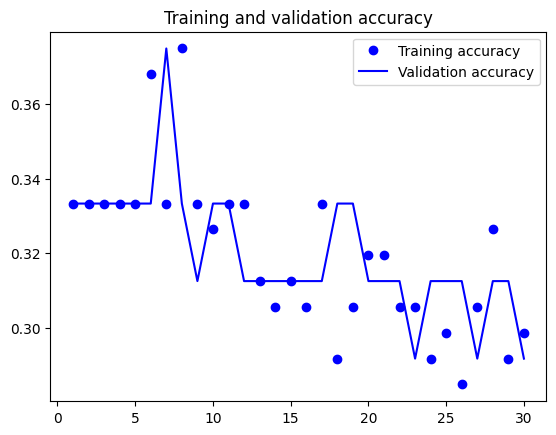

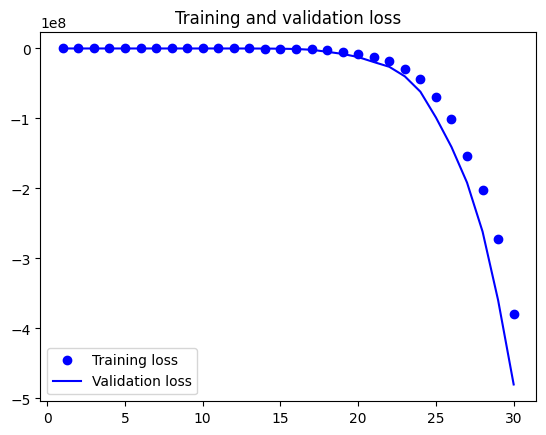

In [18]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [19]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(testDatasetBatched)
print(f"Test accuracy: {test_acc:.3f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.2812 - loss: -309540256.0000
Test accuracy: 0.333
